In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(seed=10)
Nfreq = 200
freq = np.random.uniform(0,10,Nfreq)

np.random.seed(seed=15)
Namp = 200
amp = 10 * np.abs(np.random.uniform(0,1,Namp))


np.random.seed(seed=20)
Nphi = 1
#phi =  np.random.uniform(0,np.pi,Nphi)
phi =  [0]

fsin = []

t_size = 500
t = np.linspace(0,5,t_size)

for f in freq:
  for a in amp:
    for p in phi:
      fsin.append([a,f,p,(a * np.sin(2 * np.pi * f * t + p)).tolist()])

print(fsin)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



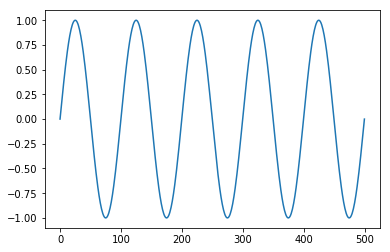

In [2]:
a = 1
f = 1
p = 0
plt.plot(a * np.sin(2 * np.pi * f * t + p))

(40000, 4)


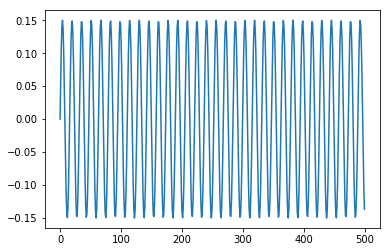

In [3]:
size = np.shape(fsin)[0]
print(np.shape(fsin))

plt.plot(fsin[500][-1])

fsin = np.array(fsin)
np.random.shuffle(fsin)
np.random.shuffle(fsin)

In [4]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


In [5]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(t_size, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

W0717 07:44:42.340478 140329775839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 07:44:42.363293 140329775839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 07:44:42.367017 140329775839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0717 07:44:42.439057 140329775839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               128500    
Total params: 293,620
Trainable params: 293,620
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
x=fsin[:,0:3]
y=fsin[:,3]
y=np.array(y.tolist())

In [7]:
NN_model.fit(x, y, epochs=200, batch_size=50, validation_split = 0.2)

W0717 07:44:55.141776 140329775839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0717 07:44:55.294415 140329775839104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 32000 samples, validate on 8000 samples
Epoch 1/200
32000/32000 [==============================] - 9s 272us/step - loss: 2.8165 - mean_absolute_error: 2.8165 - val_loss: 2.7154 - val_mean_absolute_error: 2.7154
Epoch 2/200
32000/32000 [==============================] - 8s 251us/step - loss: 2.5839 - mean_absolute_error: 2.5839 - val_loss: 2.5403 - val_mean_absolute_error: 2.5403
Epoch 3/200
32000/32000 [==============================] - 8s 254us/step - loss: 2.4496 - mean_absolute_error: 2.4496 - val_loss: 2.3994 - val_mean_absolute_error: 2.3994
Epoch 4/200
32000/32000 [==============================] - 8s 262us/step - loss: 2.3175 - mean_absolute_error: 2.3175 - val_loss: 2.2836 - val_mean_absolute_error: 2.2836
Epoch 5/200
32000/32000 [==============================] - 7s 223us/step - loss: 2.2119 - mean_absolute_error: 2.2119 - val_loss: 2.1910 - val_mean_absolute_error: 2.1910
Epoch 6/200
32000/32000 [==============================] - 7s 226us/step - loss: 2.1279 - mean_a

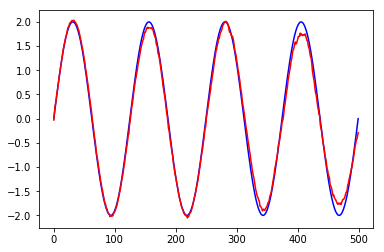

In [22]:
a = 2
f = 0.8
p = 0
x_test=np.array([[a,f,p]])
y_test = NN_model.predict(x_test)

plt.plot(a * np.sin(2 * np.pi * f * t + p), '-b')
plt.plot(y_test[0],'-r')
plt.show()

